In [1]:
#import the necessary libraries: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#calling this option to stop the rows and columns from being truncated in their display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [3]:
wd = r"C:\Users\Robby\Desktop\IAA\Personal Projects\WiDS"
train = pd.read_csv(wd+r'\TrainingWiDS2021.csv')
train_df = pd.read_csv(wd+r'\TrainingWiDS2021.csv')
test_df= pd.read_csv(wd+r'\UnlabeledWiDS2021.csv')

In [4]:
train.shape

(130157, 181)

In [5]:
train=train.iloc[:,1:]

In [6]:
train.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0

In [7]:
train.diabetes_mellitus.mean()

0.21628494817796967

21.6% of the patients in the training dataset have diabetes_mellitus

<AxesSubplot:>

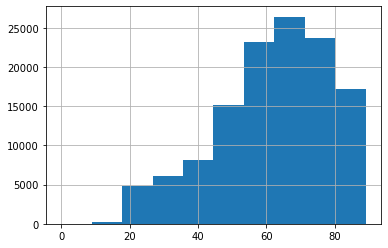

In [8]:
train.age.hist()

In [9]:
train.describe()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.00000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.00000,105275.000000,30437.000000,127967.00000,127967.000000,129448.000000,127967.000000,115461.000000,129848.00000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.00000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.00000,129886.000000,128534.00000,128534.000000,125663.000000,125663.000000,25328.00000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,118827.000

-thangs to look at:
    -age where < 5 vs weight

In [10]:
vars = train.columns.tolist()
vars

['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp

In [11]:
round(train.isna().sum()/len(train)*100,2)

encounter_id                   0.0
hospital_id                    0.0
                              ... 
solid_tumor_with_metastasis    0.0
diabetes_mellitus              0.0
Length: 180, dtype: float64

In [12]:
#suffix=train.columns[train.startswith('h1')==True]
suffix= [col[3:] for col in train if col.startswith('h1')]

suffix

['diasbp_invasive_max',
 'diasbp_invasive_min',
 'diasbp_max',
 'diasbp_min',
 'diasbp_noninvasive_max',
 'diasbp_noninvasive_min',
 'heartrate_max',
 'heartrate_min',
 'mbp_invasive_max',
 'mbp_invasive_min',
 'mbp_max',
 'mbp_min',
 'mbp_noninvasive_max',
 'mbp_noninvasive_min',
 'resprate_max',
 'resprate_min',
 'spo2_max',
 'spo2_min',
 'sysbp_invasive_max',
 'sysbp_invasive_min',
 'sysbp_max',
 'sysbp_min',
 'sysbp_noninvasive_max',
 'sysbp_noninvasive_min',
 'temp_max',
 'temp_min',
 'albumin_max',
 'albumin_min',
 'bilirubin_max',
 'bilirubin_min',
 'bun_max',
 'bun_min',
 'calcium_max',
 'calcium_min',
 'creatinine_max',
 'creatinine_min',
 'glucose_max',
 'glucose_min',
 'hco3_max',
 'hco3_min',
 'hemaglobin_max',
 'hemaglobin_min',
 'hematocrit_max',
 'hematocrit_min',
 'inr_max',
 'inr_min',
 'lactate_max',
 'lactate_min',
 'platelets_max',
 'platelets_min',
 'potassium_max',
 'potassium_min',
 'sodium_max',
 'sodium_min',
 'wbc_max',
 'wbc_min',
 'arterial_pco2_max',
 'arte

In [13]:
# Create dataframes for each measurement to check for matching values
vars = {}
for i in suffix:
    vars[i] = train[train['h1_'+i] == train['d1_'+i]][['h1_'+i,'d1_'+i]]
    vars[i] = vars[i].dropna(axis=0)
    print(vars[i])

        h1_diasbp_invasive_max  d1_diasbp_invasive_max
3                         62.0                    62.0
6                        107.0                   107.0
...                        ...                     ...
130120                    70.0                    70.0
130128                    74.0                    74.0

[7072 rows x 2 columns]
        h1_diasbp_invasive_min  d1_diasbp_invasive_min
8                         52.0                    52.0
14                        46.0                    46.0
...                        ...                     ...
130136                    56.0                    56.0
130144                    41.0                    41.0

[5571 rows x 2 columns]
        h1_diasbp_max  d1_diasbp_max
0                68.0           68.0
2                88.0           88.0
...               ...            ...
130148           88.0           88.0
130152          102.0          102.0

[31486 rows x 2 columns]
        h1_diasbp_min  d1_diasbp_min
8    

[11779 rows x 2 columns]
        h1_creatinine_max  d1_creatinine_max
8                    1.16               1.16
9                    0.83               0.83
...                   ...                ...
130147               1.90               1.90
130156               1.06               1.06

[15133 rows x 2 columns]
        h1_creatinine_min  d1_creatinine_min
1                    0.56               0.56
6                    0.78               0.78
...                   ...                ...
130151               0.73               0.73
130156               1.06               1.06

[13466 rows x 2 columns]
        h1_glucose_max  d1_glucose_max
1                145.0           145.0
6                197.0           197.0
...                ...             ...
130151           182.0           182.0
130156           100.0           100.0

[22018 rows x 2 columns]
        h1_glucose_min  d1_glucose_min
9                134.0           134.0
18                88.0            88.0
...   

In [14]:
# Check for percent matching between h1 and d1 columns for each measurement
vars2 = {'Var':[],'Percent Match':[]}
for i in suffix:
    vars2['Var'].append(i)
    PM = (len(vars[i]) / train['h1_'+i].notnull().count()) *100
    vars2['Percent Match'].append(PM)

x = pd.DataFrame(vars2)
x = x.sort_values('Percent Match', ascending=False)
x.head()

,Var,Percent Match
16,spo2_max,50.950775
45,inr_min,37.603817
44,inr_max,37.603817
25,temp_min,31.367502
6,heartrate_max,26.186068


In [15]:
# Create dataframes for each measurement to check if h1 has value and d1 does not
vars3 = {}
for i in suffix:
    vars3[i] = train[train['h1_'+i].isna() & train['d1_'+i].notnull()][['h1_'+i,'d1_'+i]]
    print(vars3[i])

        h1_diasbp_invasive_max  d1_diasbp_invasive_max
0                          NaN                    46.0
41                         NaN                    73.0
...                        ...                     ...
130134                     NaN                    85.0
130148                     NaN                    83.0

[9761 rows x 2 columns]
        h1_diasbp_invasive_min  d1_diasbp_invasive_min
0                          NaN                    32.0
41                         NaN                    42.0
...                        ...                     ...
130134                     NaN                    40.0
130148                     NaN                    49.0

[9761 rows x 2 columns]
        h1_diasbp_max  d1_diasbp_max
83                NaN           73.0
117               NaN          111.0
...               ...            ...
130072            NaN           75.0
130110            NaN           69.0

[5250 rows x 2 columns]
        h1_diasbp_min  d1_diasbp_min
83    

[91256 rows x 2 columns]
        h1_calcium_max  d1_calcium_max
0                  NaN             8.5
5                  NaN             8.8
...                ...             ...
130154             NaN             8.1
130155             NaN             6.4

[89229 rows x 2 columns]
        h1_calcium_min  d1_calcium_min
0                  NaN             7.4
5                  NaN             8.8
...                ...             ...
130154             NaN             8.0
130155             NaN             6.4

[89229 rows x 2 columns]
        h1_creatinine_max  d1_creatinine_max
0                     NaN               2.51
5                     NaN               0.71
...                   ...                ...
130154                NaN               2.65
130155                NaN               2.21

[91511 rows x 2 columns]
        h1_creatinine_min  d1_creatinine_min
0                     NaN               2.23
5                     NaN               0.71
...                   ..

In [16]:
# Data frames where d1 is greater than h1 (should only see this in max values)
vars4 = {}
for i in suffix:
    vars4[i] = train[train['h1_'+i] < train['d1_'+i]][['h1_'+i,'d1_'+i]]
    print(vars4[i])

        h1_diasbp_invasive_max  d1_diasbp_invasive_max
9                         73.0                    74.0
10                        74.0                    80.0
...                        ...                     ...
130151                    59.0                   140.0
130154                    62.0                    93.0

[17124 rows x 2 columns]
        h1_diasbp_invasive_min  d1_diasbp_invasive_min
249                       45.0                    47.0
655                       64.0                    70.0
...                        ...                     ...
126847                    28.0                    53.0
129092                    43.0                    50.0

[859 rows x 2 columns]
        h1_diasbp_max  d1_diasbp_max
1                61.0           95.0
5                89.0          100.0
...               ...            ...
130155           65.0           80.0
130156           86.0           91.0

[88338 rows x 2 columns]
        h1_diasbp_min  d1_diasbp_min
90   

[10092 rows x 2 columns]
Empty DataFrame
Columns: [h1_creatinine_min, d1_creatinine_min]
Index: []
        h1_glucose_max  d1_glucose_max
15                92.0           109.0
18                88.0           114.0
...                ...             ...
130147            69.0            73.0
130149            74.0           209.0

[32673 rows x 2 columns]
        h1_glucose_min  d1_glucose_min
57699             42.0           132.0
74336             42.0           125.0
119991            42.0            54.0
        h1_hco3_max  d1_hco3_max
6              30.0         33.0
16             26.0         27.0
...             ...          ...
130135         22.0         25.0
130149         23.0         26.0

[11126 rows x 2 columns]
        h1_hco3_min  d1_hco3_min
107             6.0          7.0
505             6.0          7.0
...             ...          ...
129126          6.0         38.0
129157          6.0          7.0

[217 rows x 2 columns]
        h1_hemaglobin_max  d1_hemaglobi

In [17]:
# Take min/max between h1 and d1 columns
#d1_mins = [col for col in train if col.endswith('min') & col.startswith('d1')]
#d1_maxs = [col for col in train if col.endswith('max') & col.startswith('d1')]
#h1_mins = [col for col in train if col.endswith('min') & col.startswith('h1')]
#h1_maxs = [col for col in train if col.endswith('max') & col.startswith('h1')]

train2 = train
suffix2= [col[3:-4] for col in train if col.startswith('h1')]
for i in suffix2:
    train2[i + '_min'] = train2[['d1_'+i+'_min','h1_'+i+'_min']].min(axis=1)
    train2[i + '_max'] = train2[['d1_'+i+'_max','h1_'+i+'_max']].max(axis=1)

In [21]:
train3 = train2.loc[:,~train2.columns.str.startswith('h1')]
train4 = train3.loc[:,~train3.columns.str.startswith('d1')]

In [23]:
train = train4

In [ ]:
#variables to exclude from analysis
-hospital_admit_source - 25% missing and no vital info
-

In [ ]:
variables with large % of missing values
-albumin_apache - 60%